# **Enhancing Email Communication with AI: Mitigating Misinterpretation through Sentiment and Tone Analysis**

In [1]:
# Dependencies to be installed
!pip install language-tool-python matplotlib nltk seaborn spacy textblob textstat transformers

In [2]:
# Libraries to be imported
import language_tool_python
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import spacy
from textblob import TextBlob
import textstat
from transformers import pipeline

from IPython.display import display, HTML
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

## **Part 1: Check Spelling and Grammar**

Using **Natural Language Processing (NLP)** tools, the function analyzes the email text for linguistic issues and provides actionable corrections. By allowing users to interactively choose corrections or provide their own replacements, this tool ensures flexibility and user engagement while enhancing the overall quality and professionalism of the text.

### **Tools Used**
1. **LanguageTool (via `language_tool_python`)**:
  - An open-source grammar and style checker capable of identifying a wide range of grammatical, spelling, and stylistic issues.
  - Provides detailed suggestions and explanations for detected errors.
2. **Python (Interactive Corrections)**:
  - Implements a user-friendly interface to review and apply corrections sequentially.
  - Dynamically adjusts the content during corrections to maintain the integrity of offsets.

### **Key Features**
1. **Interactive Correction Process**:
  - Allows the user to select suggestions or provide custom corrections.
2. **Error Breakdown Chart**:
  - Displays the distribution of error types (Grammar, Spelling, Style) as a bar chart.
3. **Error Resolution Timeline**:
  - Allows the user to select suggestions or provide custom corrections.

In [3]:
def check_grammar_and_spelling(email_content):
    """
    Checks the grammar and spelling of the given email content, provides corrections,
    and generates visualizations (Error Breakdown Chart and Error Resolution Timeline).

    Args:
        email_content (str): The text of the email to analyze.

    Returns:
        dict: A dictionary with the following keys:
              - "issues" (list): A list of grammar and spelling issues detected.
              - "corrected_email" (str): The corrected version of the email.
    """
    # Initialize the LanguageTool object for English
    tool = language_tool_python.LanguageTool('en-US')

    # Detect grammar and spelling issues
    matches = tool.check(email_content)

    # Extract details of each match
    issues = []
    for match in matches:
        issues.append({
            "message": match.message,
            "suggestions": match.replacements,
            "offset": match.offset,
            "error_length": match.errorLength,
            "error_text": email_content[match.offset:match.offset + match.errorLength],
            "type": "Grammar" if "grammar" in match.ruleId.lower() else "Spelling" if "spelling" in match.ruleId.lower() else "Style"
        })

    # Sort matches by offset to apply corrections sequentially
    issues = sorted(issues, key=lambda x: x['offset'])

    # Interactive correction process
    print("Detected Issues:")
    corrected_content = email_content
    adjustment = 0  # Tracks cumulative changes to the offset
    correction_steps = []

    for i, issue in enumerate(issues):
      # Adjust offset for changes made to previous text
      adjusted_offset = issue['offset'] + adjustment

      # Skip if adjusted offset is invalid or overlaps corrected content
      if adjusted_offset < 0 or adjusted_offset >= len(corrected_content):
          continue

      print(f"\nError: '{issue['error_text']}' ({issue['message']})")
      if issue['suggestions']:
          print("Suggestions:")
          for j, suggestion in enumerate(issue['suggestions'], 1):
              print(f"  {j}: {suggestion}")
          print("  0: Enter a custom replacement")
      else:
          print("No suggestions available. Enter your own replacement.")

      while True:
          user_choice = input("Choose a suggestion (number) or provide your replacement: ")
          if user_choice.isdigit():
              choice_index = int(user_choice)
              if 0 <= choice_index <= len(issue['suggestions']):
                  # Apply suggestion or prompt for custom replacement
                  if choice_index == 0:
                      custom_replacement = input("Enter your replacement: ")
                  else:
                      custom_replacement = issue['suggestions'][choice_index - 1]

                  # Log step
                  correction_steps.append({
                      "step": i + 1,
                      "error": issue["error_text"],
                      "correction": custom_replacement
                  })

                  # Apply replacement and update offset adjustment
                  corrected_content = (
                      corrected_content[:adjusted_offset] +
                      custom_replacement +
                      corrected_content[adjusted_offset + issue['error_length']:]
                  )
                  adjustment += len(custom_replacement) - issue['error_length']
                  break
              else:
                  print("Invalid choice. Please enter a valid number.")
          else:
              print("Invalid input. Please enter a number.")

    # Visualization: Error Breakdown Chart
    error_types = [issue["type"] for issue in issues]
    error_counts = {etype: error_types.count(etype) for etype in set(error_types)}

    plt.figure(figsize=(8, 6))
    plt.bar(error_counts.keys(), error_counts.values(), color=["skyblue", "lightgreen", "salmon"])
    plt.title("Error Breakdown")
    plt.xlabel("Error Type")
    plt.ylabel("Count")
    plt.show()

    # Visualization: Error Resolution Timeline
    if correction_steps:
        steps = [step["step"] for step in correction_steps]
        errors = [step["error"] for step in correction_steps]
        corrections = [step["correction"] for step in correction_steps]

        plt.figure(figsize=(10, 6))
        plt.plot(steps, errors, label="Errors", marker="o", linestyle="--", color="lightblue")
        plt.plot(steps, corrections, label="Corrections", marker="x", linestyle="-", color="lightgreen")
        plt.title("Error Resolution Timeline")
        plt.xlabel("Step")
        plt.xticks(steps)
        plt.ylabel("Text")
        plt.legend()
        plt.grid()
        plt.show()

    # Return the detected issues and the corrected email
    return {
        "issues": issues,
        "corrected_email": corrected_content
    }



Detected Issues:


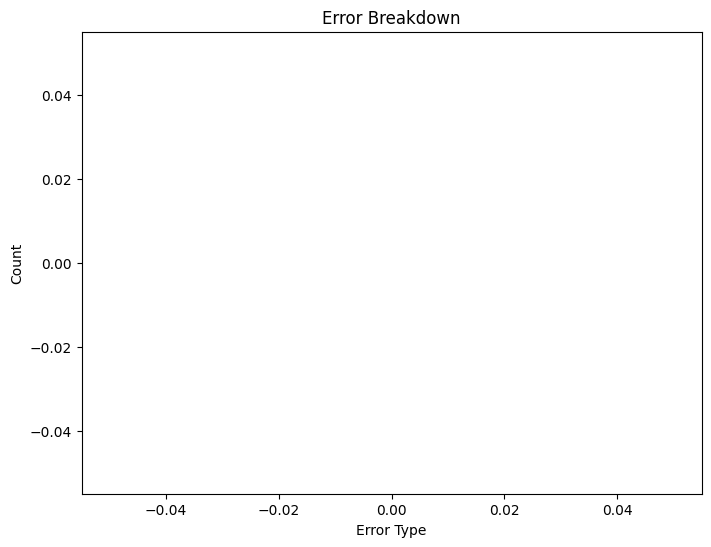


Final Corrected Content:

Hi John,

I hope you're doing well. I don't mean to be rude, but we really need to talk about the report.
You always say you will send it, but it never happens. I shouldn't have to remind you again.
Please get it to me by tomorrow.

Best,
Mark



In [4]:
# Example email content
# email_content = """
# Hi team,

# I wanted to tells yall that the project's dely is causing some problems.
# We need to discusses this further. Can you gives me a update?

# Thanks,
# Jane
# """

# email_content = """
# Hi Team,

# I hope this emial finds you well. I think we needs to have an honest discuss about the delays in our projet. You alway say the deadlines are manageble, but they never seem to be met.

# Maybe we could of planned better, but I shouldn’t of have to constantly follow up. No offense, but it feel like some of you aren’t taking ownership of your task.

# I beleive we can turn this around, but I’m concern about how this might effect our client relationship. Could we perhaps revisit the task allocations and insure everyone understands their responsibilites?

# Also, just saying, it might be helpful if everyone shares there updates during tommorow’s meeting. That way, their’s no confusion about progress.

# Please review your tasks before the meeting and come prepard with any suggestion for improvement.

# Thnaks,
# Alex
# """

email_content = """
Hi John,

I hope you're doing well. I don't mean to be rude, but we really need to talk about the report.
You always say you will send it, but it never happens. I shouldn't have to remind you again.
Please get it to me by tomorrow.

Best,
Mark
"""

# Analyze grammar and spelling interactively
result = check_grammar_and_spelling(email_content)

# Print the final corrected content
print("\nFinal Corrected Content:")
print(result["corrected_email"])


## **Part 2: Clarity and Readability Check**

Clarity and readability check is added before sentiment analysis with the understanding that enhanced clarity can help improve the accuracy of sentiment analysis by eliminating ambiguity. This is essential for reducing misunderstandings in email correspondence.

**Tools Used**
1. **TextStat Library**:
- A Python library used to calculate various readability metrics.


- **Key Metrics Used**:
  -  **Flesch Reading Ease**:
    - A higher score means that the text is easier to read.
  - **Flesch-Kincaid Grade Level**:
    - Represents the US school grade requied to understand the text.
  - **Dale-Chall Readability Score**:
    - Measures how difficult words are in a text.
    - A lower score means easier readability.
  - **Reading Time (minutes)**:
    - Provides an estimated reading time based on a standard reading speed.

2. **Pandas Library**:
- Used to organize readability metrics into a tabular format.

3. **Matplotlib Library**:
- Used to create visual representations of the readability metrics.
- **Visualizations**:
  - **Bar Chart for Original Text**:
    - Highlights the readability metrics of the original content.
  - **Comparison Chart**:
    - Displays side-by-side comparisons of metrics for the original and corrected text, showcasing improvements.

In [5]:
def analyze_readability(original_text, corrected_text=None):
    """
    Analyze the readability of the given text and optionally compare it with corrected text.

    Args:
        original_text (str): The original text to analyze.
        corrected_text (str, optional): The corrected text to compare against the original.

    Returns:
        pd.DataFrame: A DataFrame containing readability metrics for the original and optionally corrected text.
    """
    # Calculate readability scores for the original text
    original_scores = {
        "Flesch Reading Ease": textstat.flesch_reading_ease(original_text),
        "Grade Level": textstat.flesch_kincaid_grade(original_text),
        "Dale-Chall Readability Score": textstat.dale_chall_readability_score(original_text),
        "Reading Time (minutes)": round(len(original_text.split()) / 200, 2)  # Assuming 200 words per minute
    }

    # Initialize corrected scores as None
    corrected_scores = None

    if corrected_text:
        # Calculate readability scores for the corrected text
        corrected_scores = {
            "Flesch Reading Ease": textstat.flesch_reading_ease(corrected_text),
            "Grade Level": textstat.flesch_kincaid_grade(corrected_text),
            "Dale-Chall Readability Score": textstat.dale_chall_readability_score(corrected_text),
            "Reading Time (minutes)": round(len(corrected_text.split()) / 200, 2)
        }

        # Create a DataFrame for comparison
        df = pd.DataFrame([original_scores, corrected_scores], index=["Original", "Corrected"])
        # print("\nReadability Metrics Comparison:")
        # print(df)

        # Prepare data for comparison visualization
        labels = list(original_scores.keys())
        original_values = [original_scores[metric] for metric in labels]
        corrected_values = [corrected_scores[metric] for metric in labels]

        # Create a bar chart for readability comparison
        x = range(len(labels))
        plt.figure(figsize=(12, 6))
        plt.bar(x, original_values, width=0.4, label='Original', color='lightblue', align='center')
        plt.bar([pos + 0.4 for pos in x], corrected_values, width=0.4, label='Corrected', color='lightgreen', align='center')

        # Add chart details
        plt.title("Comparison of Readability Metrics: Original vs. Corrected")
        plt.xlabel("Readability Metrics")
        plt.ylabel("Scores")
        plt.xticks([pos + 0.2 for pos in x], labels, rotation=45, ha="right")
        plt.legend()
        plt.tight_layout()
        plt.show()

    else:
        # Create a DataFrame for the original text only
        df = pd.DataFrame([original_scores], index=["Original"])
        print("\nReadability Metrics for Original Text:")
        print(df)

        # Visualization for original text only
        labels = list(original_scores.keys())
        original_values = [original_scores[metric] for metric in labels]

        plt.figure(figsize=(8, 6))
        plt.bar(labels, original_values, color="lightblue")
        plt.title("Readability Metrics for Original Text")
        plt.xlabel("Metrics")
        plt.ylabel("Scores")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

    return df

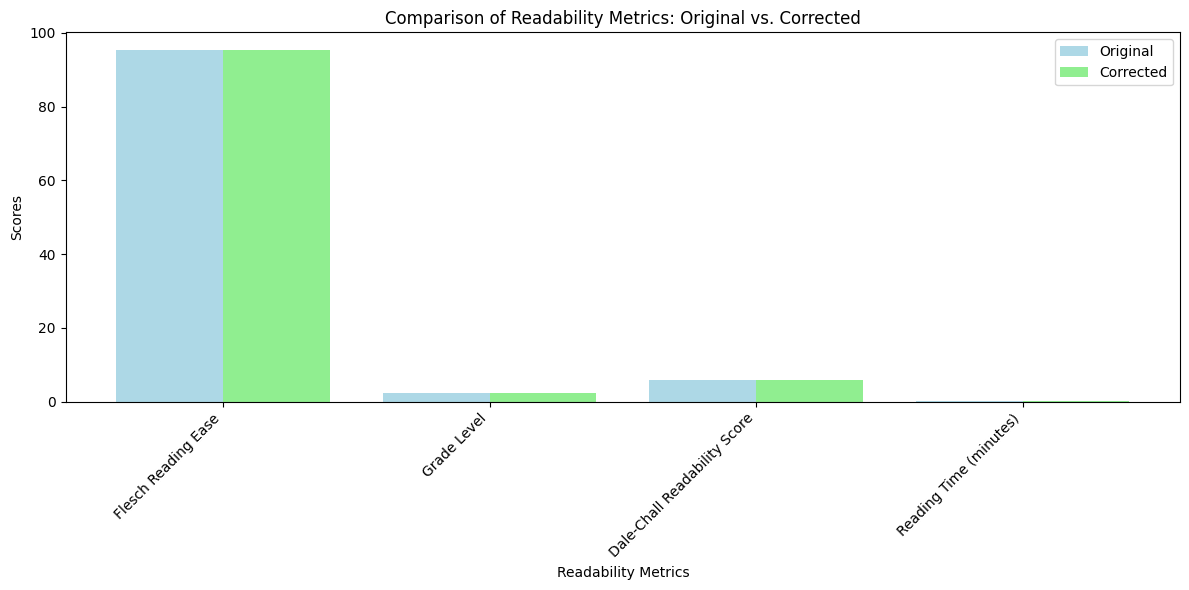

,Flesch Reading Ease,Grade Level,Dale-Chall Readability Score,Reading Time (minutes)
Original,95.37,2.4,5.73,0.24
Corrected,95.37,2.4,5.73,0.24


In [6]:
# Compare readability scores
analyze_readability(email_content, result["corrected_email"])

## **Part 3: Sentiment Analysis**

Sentiment analysis evaluates the emotional tone of email content, classifying it as **positive**, **neutral**, or **negative**. This ensures the email's tone aligns with its intended purpose, reducing miscommunication.

### **VADER Sentiment Analysis**
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon-based tool designed for short-form text, such as emails or social media posts.

**Key Features**:
- Assigns scores for:
  - **Positive**, **Neutral**, **Negative**, and **Compound Sentiment** (overall tone: -1 to +1).
- Considers context, including:
  - **Intensifiers** (e.g., "very"), **negations** (e.g., "not happy"), and punctuation or emoticons (e.g., "!!!", ":)").

**Implementation**
- **Input**: The email content is analyzed for sentiment scores.
- **Output**: A table and bar chart provide sentiment breakdown and overall tone classification.

In [7]:
def analyze_sentiment(email_content):
    """
    Analyze the sentiment of the given email content.

    Args:
        email_content (str): The email content to analyze.

    Returns:
        dict: Sentiment analysis results, including scores and overall sentiment.
    """
    # Ensure the VADER lexicon is available
    nltk.download('vader_lexicon', quiet=True)

    # Initialize the VADER sentiment analyzer
    sia = SentimentIntensityAnalyzer()

    # Perform sentiment analysis
    sentiment_scores = sia.polarity_scores(email_content)

    # Determine the overall sentiment based on the compound score
    compound_score = sentiment_scores["compound"]
    if compound_score >= 0.05:
        overall_sentiment = "Positive"
    elif compound_score <= -0.05:
        overall_sentiment = "Negative"
    else:
        overall_sentiment = "Neutral"

    # Add the overall sentiment to the results
    sentiment_results = {
        "Positive Score": sentiment_scores["pos"],
        "Neutral Score": sentiment_scores["neu"],
        "Negative Score": sentiment_scores["neg"],
        "Compound Score": sentiment_scores["compound"],
        "Overall Sentiment": overall_sentiment
    }

    # Convert sentiment results into a DataFrame
    sentiment_df = pd.DataFrame([sentiment_results])

    # Reset the index for display
    sentiment_df.index = ['']

    # Visualization: Sentiment Scores
    labels = ["Positive", "Neutral", "Negative", "Compound"]
    scores = [
        sentiment_scores["pos"],
        sentiment_scores["neu"],
        sentiment_scores["neg"],
        sentiment_scores["compound"]
    ]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, scores, color=["lightgreen", "lightblue", "salmon", "gray"])
    plt.title("Sentiment Scores")
    plt.xlabel("Sentiment Type")
    plt.ylabel("Score")
    plt.ylim(0, 1)  # Normalized scores
    plt.tight_layout()
    plt.show()

    return sentiment_df

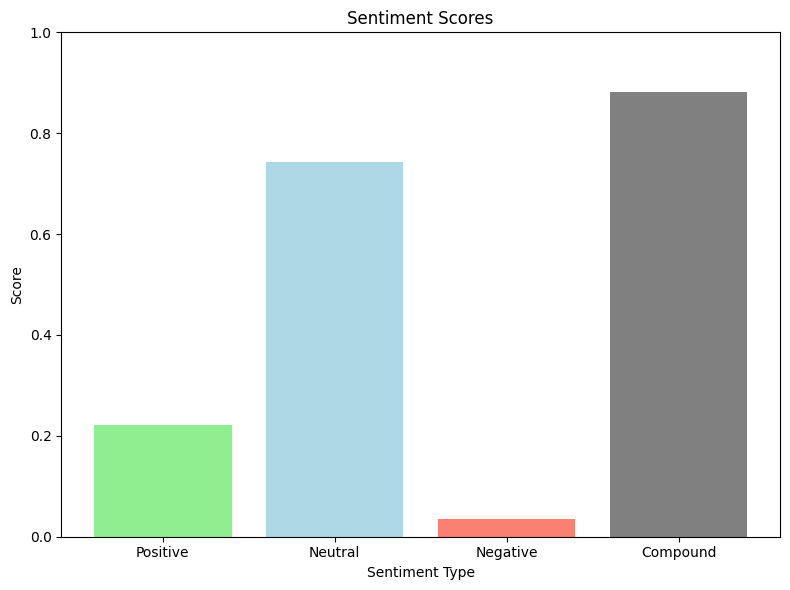

,Positive Score,Neutral Score,Negative Score,Compound Score,Overall Sentiment
,0.222,0.742,0.036,0.882,Positive


In [8]:
# Perform sentiment analysis on the corrected email content
corrected_email_sentiment = analyze_sentiment(result["corrected_email"])
corrected_email_sentiment

## **Part 4: Emotion Detection**

**What Emotion Detection Adds Beyond Sentiment Analysis**
- **Granularity**:
  - Emotion detection identifies **specific emotional states** like joy, sadness, anger, fear, surprise, etc., offering a deeper understanding of emotional tone.
- **Contextual Insight**:
  - Sentiment might label a message as "negative," but emotion detection tells you why. For instance:
    - "I'm upset about the delays" = Anger
    - "I'm worried about the delays" = Fear
    - Both are negative in sentiment but reflect distinct emotions.
- **Practical Applications**:
 - Emotion detection helps fine-tune responses. For example:
    - If **fear** is detected, the response could aim to reassure.
    - If **anger** is detected, the response might focus on resolving specific concerns.
- **Additional Insights for Analysis**:
  - Emotion detection provides a **multidimensional view**. A single text can simultaneously convey anger, sadness, and hope, which sentiment analysis might miss.
- **Visualization and Reporting**:
  - Emotion detection can display **multiple emotions** with varying intensities, whereas sentiment analysis focuses on a single overall label.

In [17]:
# Initialize NLP models and tools
nlp = spacy.load("en_core_web_sm")  # for linguistic analysis
sia = SentimentIntensityAnalyzer()  # for sentiment analysis
# tool = language_tool_python.LanguageTool('en-US')  # for grammar and spell checking
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")  # for summarization
tone_analyzer = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")  # for emotional tone
nli_model = pipeline("text-classification", model="roberta-large-mnli")

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [20]:
# Function to clean and preprocess the email text
def preprocess_text(text):
    """
    Preprocess the email content to clean and standardize text.

    Args:
        text (str): The raw email content.

    Returns:
        str: The cleaned email content.
    """
    # Remove extra spaces, newlines, and tabs
    text = re.sub(r'\s+', ' ', text)
    # Strip leading and trailing spaces
    text = text.strip()
    return text

# Function to analyze emotional tone using Hugging Face model
def analyze_emotional_tone(email_content):
    result = tone_analyzer(email_content)
    return result[0] if result else None

# Function for summary generation
def generate_summary(email_content):
    summary = summarizer(email_content, max_length=30, min_length=10, do_sample=False)
    return summary[0]['summary_text']

# Function to detect indirect or passive-aggressive tone
def detect_passive_aggressive(email_content):
    """
    Detect passive-aggressive tone using a combination of hedging and contradictions.

    Args:
        email_content (str): The email content to analyze.

    Returns:
        list: A list of flagged sentences with passive-aggressive tone.
    """
    hedging = detect_hedging_nli(email_content)
    contradictions = detect_contradictions(email_content)

    return {"Hedging": hedging, "Contradictions": contradictions}

def detect_hedging_nli(email_content):
    """
    Use an NLI model to detect hedging phrases.

    Args:
        email_content (str): The email content to analyze.

    Returns:
        list: A list of sentences flagged as hedging and the count.
    """
    doc = nlp(email_content)
    hedging_phrases = []

    for sent in doc.sents:
        premise = sent.text.strip()  # Clean whitespace from sentences
        if not premise:  # Skip empty sentences
            continue

        hypothesis = "This statement is definitive and certain."
        result = nli_model(f"{premise} {hypothesis}")
        for res in result:
            if res["label"] == "NEUTRAL" and res["score"] > 0.6:
                hedging_phrases.append(sent.text.strip())

    return {"hedging_phrases": list(set(hedging_phrases)), "count": len(set(hedging_phrases))}


def detect_contradictions(email_content):
    """
    Detect contradictions using sentence pairs.

    Args:
        email_content (str): The email content to analyze.

    Returns:
        list: A list of detected contradictions.
    """
    doc = nlp(email_content)
    contradictions = []

    sentences = [sent.text for sent in doc.sents]
    for i in range(len(sentences) - 1):  # Compare sentence pairs
        pair_result = nli_model(f"{sentences[i]} {sentences[i + 1]}")
        for res in pair_result:
            if res["label"] == "CONTRADICTION" and res["score"] > 0.6:
                contradictions.append((sentences[i], sentences[i + 1]))

    return contradictions

def detect_problematic_keywords(email_content):
    """
    Detect problematic keywords dynamically using sentence-level sentiment analysis.

    Args:
        email_content (str): The email content to analyze.

    Returns:
        list: A list of sentences flagged as problematic.
    """
    doc = nlp(email_content)
    problematic_sentences = []

    for sent in doc.sents:
        sentiment = sia.polarity_scores(sent.text)
        if sentiment["neg"] > 0.5:  # Threshold for high negativity
            problematic_sentences.append(sent.text)

    return list(set(problematic_sentences))  # Unique problematic sentences

# Function to provide suggestions based on analysis
def provide_suggestions(email_content):
    suggestions = []
    if detect_passive_aggressive(email_content):
        suggestions.append("Avoid passive-aggressive phrases. Try to be more direct.")
    if len(detect_problematic_keywords(email_content)) > 0:
        suggestions.append("There are some strong words that might be misinterpreted. Consider using softer language.")
    readability_score = textstat.flesch_reading_ease(email_content)
    if readability_score < 60:
        suggestions.append("The email might be difficult to understand. Try simplifying the language.")
    return suggestions

def visualize_emotional_tone(results):
    """
    Visualize the results of emotional tone analysis, including counts and details.

    Args:
        results (dict): The analysis results, including hedging phrases, contradictions, and problematic sentences.
    """
    # Extract flagged content and counts
    hedging = results.get("Hedging Phrases", {}).get("hedging_phrases", [])
    hedging_count = results.get("Hedging Phrases", {}).get("count", 0)
    contradictions = results.get("Contradictions", [])
    problematic_sentences = results.get("Problematic Sentences", [])

    # Categories and counts for visualization
    categories = ["Hedging", "Contradictions", "Problematic Sentences"]
    counts = [hedging_count, len(contradictions), len(problematic_sentences)]

    # Visualization: Bar Chart of Detected Issues
    plt.figure(figsize=(10, 6))
    plt.bar(categories, counts, color=["lightblue", "lightgreen", "salmon"])
    plt.title("Emotional Tone Analysis")
    plt.ylabel("Count")
    plt.xlabel("Categories")
    plt.ylim(0, max(counts) + 1)
    plt.tight_layout()
    plt.show()

    # Create a detailed table for flagged content
    detailed_content = (
        [{"Category": "Hedging", "Flagged Content": phrase} for phrase in hedging] +
        [{"Category": "Contradictions", "Flagged Content": f"{pair[0]} <-> {pair[1]}"} for pair in contradictions] +
        [{"Category": "Problematic Sentences", "Flagged Content": sentence} for sentence in problematic_sentences]
    )

    # Convert to DataFrame for display
    if detailed_content:
        details_df = pd.DataFrame(detailed_content)
        print("\nDetailed Results:")
        display(details_df)
    else:
        print("No flagged content found.")

# Main function to process the email and provide insights
def analyze_email(email_content, corrected_text=None):
    """
    Analyze the email content for various metrics and provide insights.

    Args:
        email_content (str): The email content to analyze.

    Returns:
        dict: A dictionary of analysis results.
    """
    # Preprocess email content
    cleaned_email = preprocess_text(email_content)

    # Sentiment analysis
    sentiment = analyze_sentiment(cleaned_email)

    # Readability check
    readability_results = analyze_readability(email_content, corrected_text)

    # Grammar and spelling correction
    corrected_email = check_grammar_and_spelling(cleaned_email)

    # Emotional tone analysis
    hedging_results = detect_hedging_nli(cleaned_email)
    contradictions = detect_contradictions(cleaned_email)
    problematic_sentences = detect_problematic_keywords(cleaned_email)

    # Compile emotional tone results
    emotional_tone_results = {
        "Hedging Phrases": hedging_results,
        "Contradictions": contradictions,
        "Problematic Sentences": problematic_sentences,
    }

    # Visualize emotional tone analysis
    visualize_emotional_tone(emotional_tone_results)

    # Generate suggestions for improvements
    suggestions = provide_suggestions(cleaned_email)

    # Compile all results
    results = {
        "sentiment": sentiment,
        "readability_score": readability_results,
        "corrected_email": corrected_email,
        "emotional_tone_results": emotional_tone_results,
        "suggestions": suggestions
    }

    return results





In [22]:
# Example email input
email_content = """
Hi John,

I hope youre doing well. I doesn't mean to be roode, but we really need talks about the report.
You alwyas say you will send it, but it never happen. I shouldnot have to remind you again.
Please get it to me by tomorrow. I am very upset.

Best,
Mark
"""

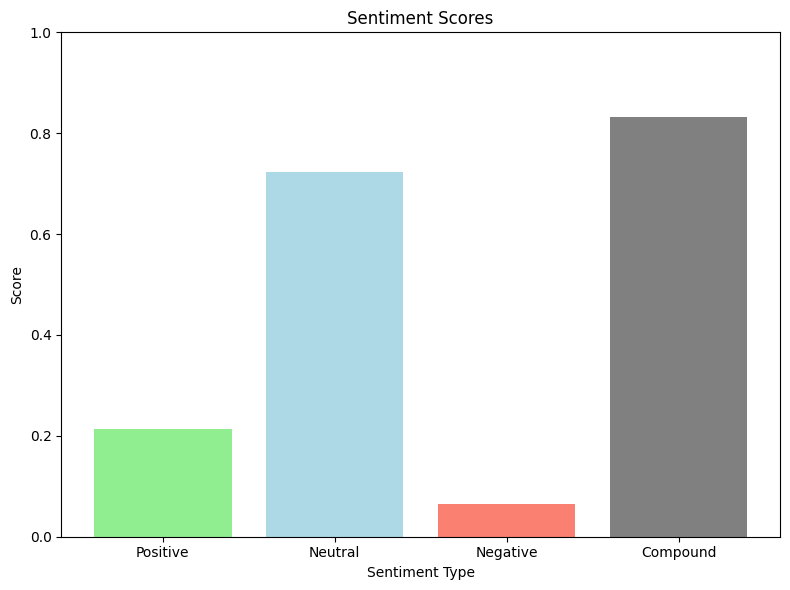

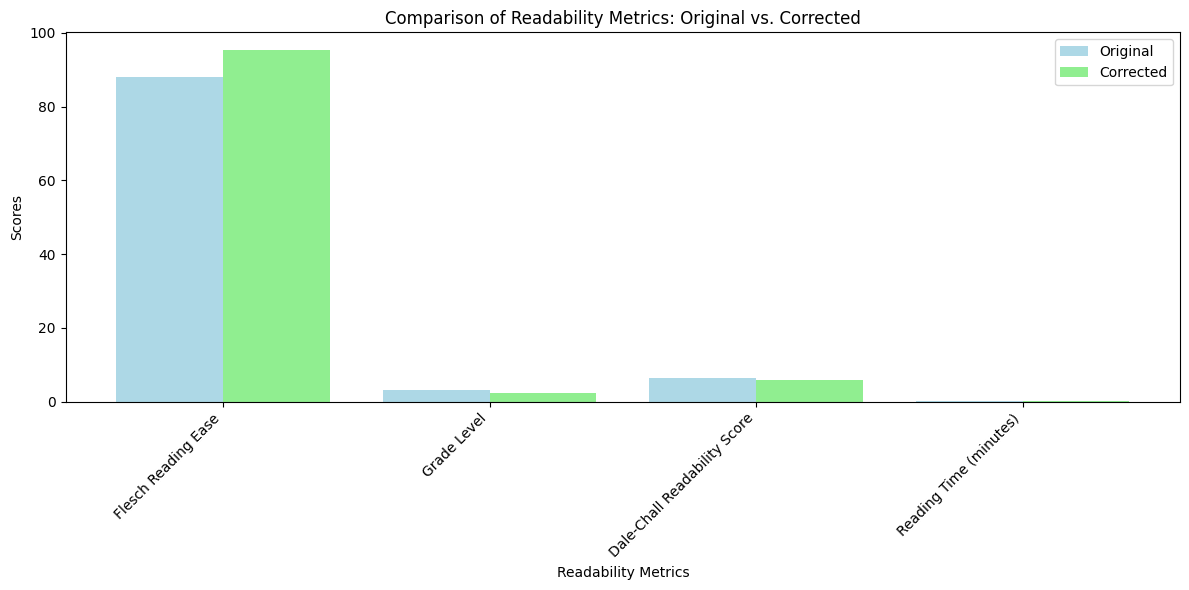

Detected Issues:

Error: 'youre' (Possible spelling mistake found.)
Suggestions:
  1: you're
  0: Enter a custom replacement
Choose a suggestion (number) or provide your replacement: 1

Error: 'doesn't' (Possible verb agreement error — use the base form here.)
Suggestions:
  1: don't
  0: Enter a custom replacement
Choose a suggestion (number) or provide your replacement: 1

Error: 'roode' (Possible spelling mistake found.)
Suggestions:
  1: rode
  2: Rhode
  3: Goode
  4: rood
  5: roods
  6: rewed
  0: Enter a custom replacement
Choose a suggestion (number) or provide your replacement: 0
Enter your replacement: rude

Error: 'alwyas' (Possible spelling mistake found.)
Suggestions:
  1: always
  0: Enter a custom replacement
Choose a suggestion (number) or provide your replacement: 1

Error: 'happen' (After ‘it’, use the third-person verb form “happens”.)
Suggestions:
  1: happens
  0: Enter a custom replacement
Choose a suggestion (number) or provide your replacement: 1

Error: 'shoul

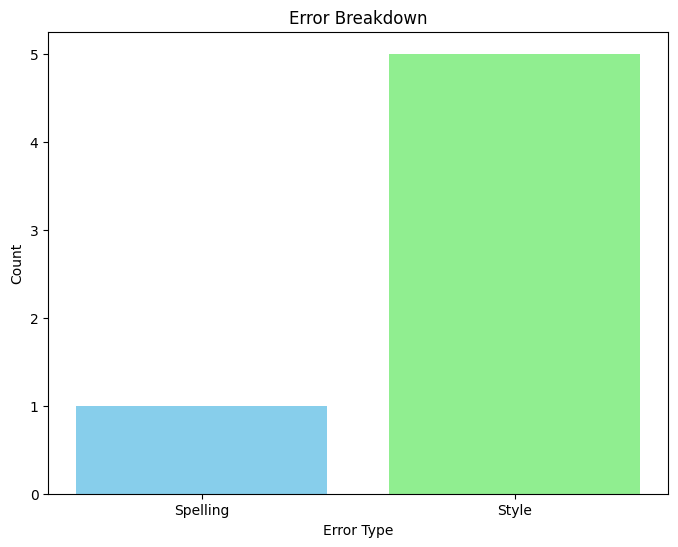

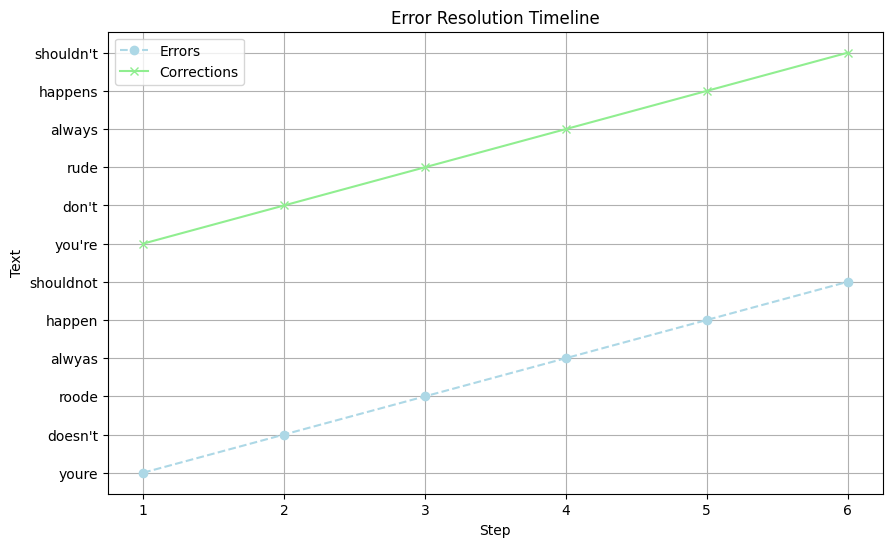

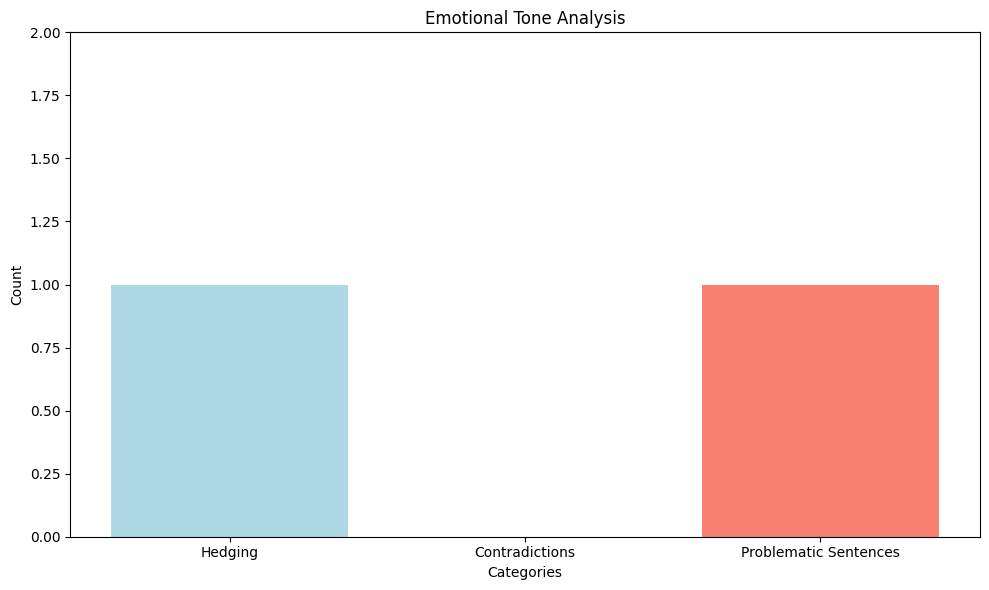


Detailed Results:


,Category,Flagged Content
0,Hedging,I am very upset.
1,Problematic Sentences,I am very upset.


Sentiment:   Positive Score  Neutral Score  Negative Score  Compound Score  \
           0.213          0.723           0.065          0.8329   

 Overall Sentiment  
          Positive  
Readability Score:            Flesch Reading Ease  Grade Level  Dale-Chall Readability Score  \
Original                 88.02          3.1                          6.50   
Corrected                95.37          2.4                          5.73   

           Reading Time (minutes)  
Original                     0.26  
Corrected                    0.24  
Corrected Email:
 {'issues': [{'message': 'Possible spelling mistake found.', 'suggestions': ["you're"], 'offset': 16, 'error_length': 5, 'error_text': 'youre', 'type': 'Spelling'}, {'message': 'Possible verb agreement error — use the base form here.', 'suggestions': ["don't"], 'offset': 36, 'error_length': 7, 'error_text': "doesn't", 'type': 'Style'}, {'message': 'Possible spelling mistake found.', 'suggestions': ['rode', 'Rhode', 'Goode', 'rood', 

In [23]:
# Run the analysis
results = analyze_email(email_content, result['corrected_email'])

# Display the results
print("Sentiment:", results["sentiment"])
print("Readability Score:", results["readability_score"])
print("Corrected Email:\n", results["corrected_email"])
print("Emotional Tone Analysis:", results["emotional_tone_results"])
print("Suggestions:", results["suggestions"])